## The Dataset contains historical sales data for 45 Amazon stores 

## Cleaning The Data - 

## I have removed all the duplicate or irrelevant columns to the questions below.

In [265]:
filelocation = 'amazon_sales_dataset.csv'

with open(filelocation, 'r') as file:
    lines = file.readlines()

header = lines[0]

rows = lines[1:]

uniquerows = set()

filteredrows = [header]  
for row in rows:
    if row not in uniquerows:
        uniquerows.add(row)
        filteredrows.append(row)

with open('filtered_dataset.csv', 'w') as file:
    for row in filteredrows:
        file.write(row)

print("All duplicate rows have been removed and the new dataset has been saved as 'filtered_dataset.csv'")


All duplicate rows have been removed and the new dataset has been saved as 'filtered_dataset.csv'


## Question 1 - What holiday generally does the stores experience high sales?

In [304]:
filelocation = 'filtered_dataset.csv'

with open(filelocation, 'r') as file:
    lines = file.readlines()

header = lines[0].strip().split(',')
rows = [line.strip().split(',') for line in lines[1:]]

yearidx = header.index('Year')
monthidx = header.index('Month')
weekidx = header.index('Week')
isholidayidx = header.index('IsHoliday')
weeklysalesidx = header.index('Weekly_Sales')

holidaysales = [
    row for row in rows if row[isholidayidx] == '1'
]

salesbyyearmonthweek = {}

for row in holidaysales:
    year = row[yearidx]
    month = row[monthidx]
    week = row[weekidx]
    weeklysales = float(row[weeklysalesidx])
    
    key = (year, month, week)
    
    if key not in salesbyyearmonthweek:
        salesbyyearmonthweek[key] = 0
    
    salesbyyearmonthweek[key] += weeklysales

highestsalesperiod = max(salesbyyearmonthweek, key=salesbyyearmonthweek.get)
highestsalesvalue = salesbyyearmonthweek[highestsalesperiod]

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

year, month, week = highestsalesperiod
monthname = months[int(month) - 1]  

print(f"The period with the highest sales occurred in {monthname}, {year}, with sales amounting to: £{highestsalesvalue:.2f}")


The period with the highest sales occurred in November, 2019, with sales amounting to: £39842434.17


## Question 2 - Comparing the Holiday and non-holiday seasons, which season generally does better in sales?

C:\Users\Admin\AppData\Local\Temp\ipykernel_7156\2283844948.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  isHoliday = int(row[isHolidayIdx])  # Check if it's a holiday week
C:\Users\Admin\AppData\Local\Temp\ipykernel_7156\2283844948.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  weeklySales = float(row[weeklySalesIdx])  # Get the weekly sales


Total sales during Non-Holiday season: £4,592,798,600.28
Total sales during Holiday season: £294,377,011.79
The non-holiday season generally has higher sales.


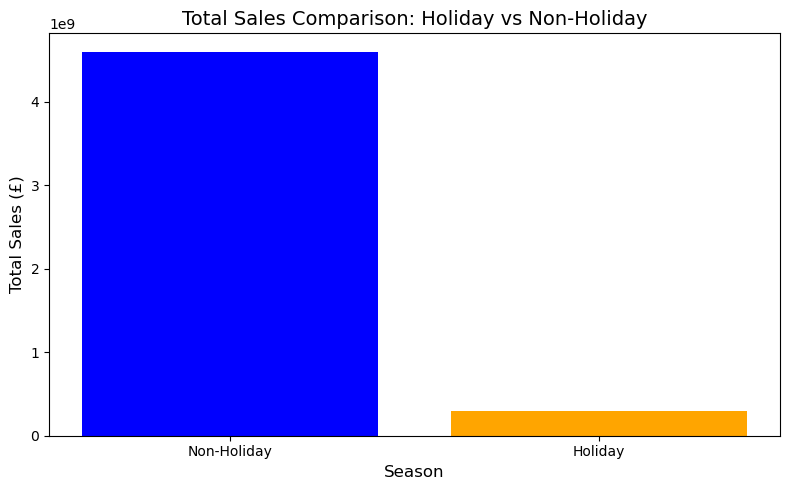

In [1]:
filelocation = 'filtered_dataset.csv'

with open(filelocation, 'r') as file:
    lines = file.readlines()

header = lines[0].strip().split(',')
rows = [line.strip().split(',') for line in lines[1:]]

isHolidayIdx = header.index('IsHoliday')
weeklySalesIdx = header.index('Weekly_Sales')

salesBySeason = {0: 0, 1: 0}  

for row in rows:
    isHoliday = int(row[isHolidayIdx])
    weeklySales = float(row[weeklySalesIdx])
    
    if isHoliday in salesBySeason:
        salesBySeason[isHoliday] += weeklySales

for isHoliday, totalSales in salesBySeason.items():
    season = 'Holiday' if isHoliday == 1 else 'Non-Holiday'
    print(f"Total sales during {season} season: £{totalSales:,.2f}")

nonHolidaySales = salesBySeason[0]
holidaySales = salesBySeason[1]

if nonHolidaySales > holidaySales:
    print("The non-holiday season generally has higher sales.")
else:
    print("The holiday season generally has higher sales.")


## Question 3 - Which store has the highest sales so far? 

In [293]:
filelocation = 'filtered_dataset.csv'

with open(filelocation, 'r') as file:
    lines = file.readlines()

header = lines[0].strip().split(',')
rows = [line.strip().split(',') for line in lines[1:]]

yearIdx = header.index('Year')
monthIdx = header.index('Month')
weekIdx = header.index('Week')
isHolidayIdx = header.index('IsHoliday')
weeklySalesIdx = header.index('Weekly_Sales')

holidaySales = [
    row for row in rows 
    if row[isHolidayIdx] == '1'
]

salesData = {}
for row in holidaySales:
    year = row[yearIdx]
    month = row[monthIdx]
    week = row[weekIdx]
    weeklySales = float(row[weeklySalesIdx])
    
    key = (year, month, week)
    
    if key not in salesData:
        salesData[key] = 0
    salesData[key] += weeklySales

highestSalesPeriod = max(salesData, key=salesData.get)
highestSalesValue = salesData[highestSalesPeriod]

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

year, month, week = highestSalesPeriod
monthName = months[int(month) - 1]  

print(f"The period with the highest sales occurred in {monthName}, {year}, with sales amounting to: £{highestSalesValue:.2f}")


The period with the highest sales occurred in November, 2019, with sales amounting to: £39842434.17


## 	Question 4 - What year did each store experience the most sales?

In [295]:
filelocation = 'filtered_dataset.csv'

with open(filelocation, 'r') as file:
    lines = file.readlines()

header = lines[0].strip().split(',')
rows = [line.strip().split(',') for line in lines[1:]]

storeIndex = header.index('Store')
yearIndex = header.index('Year')
weeklySalesIndex = header.index('Weekly_Sales')

salesByStoreYear = {}

for row in rows:
    store = row[storeIndex]
    year = row[yearIndex]
    weeklySales = float(row[weeklySalesIndex])
    
    if store not in salesByStoreYear:
        salesByStoreYear[store] = {}
    
    if year not in salesByStoreYear[store]:
        salesByStoreYear[store][year] = 0
    
    salesByStoreYear[store][year] += weeklySales

maxSalesByStore = {}

for store, years in salesByStoreYear.items():
    maxYear = max(years, key=years.get)
    maxSalesByStore[store] = (maxYear, years[maxYear])

print("Store | Year | TotalSales")
for store, (year, totalSales) in maxSalesByStore.items():
    print(f"{store} | {year} | £{totalSales:.2f}")


Store | Year | TotalSales
1 | 2020 | £55090393.70
9 | 2020 | £24049626.84
8 | 2020 | £45458358.82
4 | 2020 | £61717893.42
5 | 2020 | £16302556.76
14 | 2020 | £56690184.75
6 | 2020 | £61810500.00
3 | 2020 | £15145811.55
20 | 2019 | £58389072.45
19 | 2019 | £54482347.32
18 | 2019 | £50029601.02
42 | 2020 | £25438649.28
13 | 2019 | £57286722.18
10 | 2019 | £60181541.24
11 | 2020 | £57652712.47
16 | 2020 | £25887257.54
17 | 2019 | £39562984.29
15 | 2020 | £31016132.42
44 | 2020 | £15498541.35
45 | 2020 | £39570054.15
43 | 2020 | £26528579.46
22 | 2019 | £47726759.68
21 | 2020 | £39562687.61
23 | 2020 | £61491362.78
24 | 2019 | £53709909.26
25 | 2019 | £34658600.32
27 | 2019 | £59934055.99
2 | 2019 | £59183348.33
32 | 2020 | £48587827.46
39 | 2020 | £56177882.85
29 | 2020 | £26865470.67
31 | 2020 | £47424659.88
40 | 2020 | £42325622.66
30 | 2020 | £21956357.18
37 | 2020 | £25567046.11
36 | 2019 | £20770502.46
33 | 2020 | £12957867.37
34 | 2020 | £46966624.53
35 | 2019 | £46849732.75
41 | 20

## Question 5 -Analyse the unemployment rate and customer price

In [299]:
filelocation = 'filtered_dataset.csv'

with open(filelocation, 'r') as file:
    lines = file.readlines()

header = lines[0].strip().split(',')
rows = [line.strip().split(',') for line in lines[1:]]

dateIndex = header.index('Date')
unemploymentRateIndex = header.index('Unemployment')
customerPriceIndex = header.index('CPI')

dates = []
unemploymentRates = []
customerPrices = []

for row in rows:
    dates.append(row[dateIndex])
    unemploymentRates.append(float(row[unemploymentRateIndex]))
    customerPrices.append(float(row[customerPriceIndex]))

avgUnemploymentRate = sum(unemploymentRates) / len(unemploymentRates)
avgCustomerPrice = sum(customerPrices) / len(customerPrices)

def calculateTrend(data):
    if len(data) < 2:
        return 0
    return (data[-1] - data[0]) / len(data)

unemploymentTrend = calculateTrend(unemploymentRates)
priceTrend = calculateTrend(customerPrices)

print(f"Average Unemployment Rate: {avgUnemploymentRate:.2f}%")
print(f"Average Customer Price: £{avgCustomerPrice:.2f}")
print(f"If the unemployment rate {'INCREASES' if unemploymentTrend > 0 else 'DECREASES' if unemploymentTrend < 0 else 'STAYS STABLE'}, then the Customer Price {'INCREASES' if priceTrend > 0 else 'DECREASES' if priceTrend < 0 else 'STAYS STABLE'}")


Average Unemployment Rate: 7.70%
Average Customer Price: £173.42
If the unemployment rate INCREASES, then the Customer Price DECREASES
